<a href="https://colab.research.google.com/github/Karanamshivakumar22/Machine_learning_projects/blob/main/IMDB_MOVIE_REVIWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importin the Dataset directly from the kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vishakhdapat/imdb-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-movie-reviews


Importing the libraries

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df = pd.read_csv(path+"/IMDB Dataset.csv")

In [ ]:

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

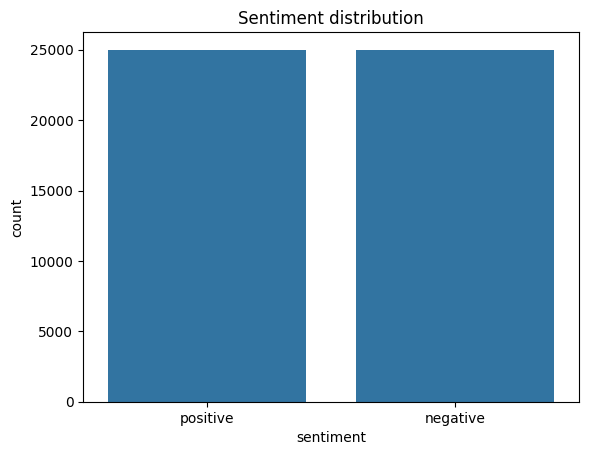

In [ ]:
sns.countplot(x='sentiment',data=df)
plt.title('Sentiment distribution')

In [ ]:
for i in range(5):
  print("Review: ",[i])
  print(df['review'].iloc[i],"\n")
  print("sentiment: ",df['sentiment'].iloc[i],"\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [ ]:
def no_of_words(text):
  words=text.split()
  word_count = len(words)
  return word_count

In [ ]:
df['word count'] = df['review'].apply(no_of_words)

In [ ]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


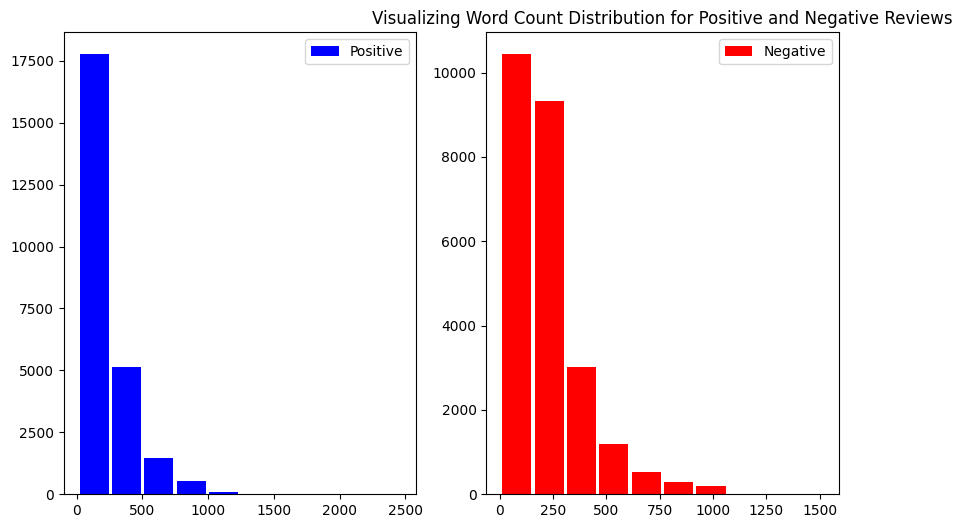

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label="Positive",color="blue",rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label="Negative",color="red",rwidth=0.9)
ax[1].legend(loc='upper right')
plt.title("Visualizing Word Count Distribution for Positive and Negative Reviews")
plt.show()

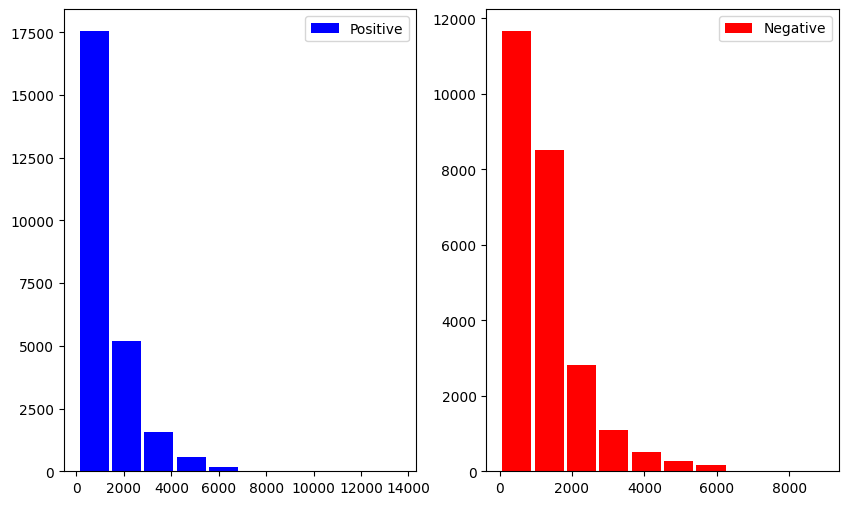

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label="Positive",color="blue",rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label="Negative",color="red",rwidth=0.9)
ax[1].legend(loc='upper right')

plt.show()

In [ ]:
df.sentiment.replace("positive",1,inplace=True)
df.sentiment.replace("negative",0,inplace=True)

In [ ]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [ ]:
def data_processing(text):
  text = text.lower()
  text = re.sub('<br />','', text)
  text = re.sub(r"https\s+|www\s+|http\s+",'',text, flags = re.MULTILINE)
  text = re.sub(r'\@w+|\#','',text)
  text = re.sub(r'[^\w\s]','',text)
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)


In [ ]:
df.review = df['review'].apply(data_processing)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230


In [ ]:
duplicated_count = df.duplicated().sum()
print('Number of duplicate entries: ', duplicated_count)

Number of duplicate entries:  421


In [ ]:
df = df.drop(df[df.duplicated()].index)
# df = df.grop_duplicates('review')
df

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230
...,...,...,...
49995,thought movie right good job wasnt creative or...,1,194
49996,bad plot bad dialogue bad acting idiotic direc...,0,112
49997,catholic taught parochial elementary schools n...,0,230
49998,im going disagree previous comment side maltin...,0,212


In [ ]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data ]
  return data

In [ ]:
df.review = df['review'].apply(lambda x: stemming(x))
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230


In [ ]:
df['word count'] = df['review'].apply(no_of_words)

In [ ]:
df

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125
...,...,...,...
49995,thought movie right good job wasnt creative or...,1,85
49996,bad plot bad dialogue bad acting idiotic direc...,0,55
49997,catholic taught parochial elementary schools n...,0,115
49998,im going disagree previous comment side maltin...,0,115


In [ ]:
pos_reviews= df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


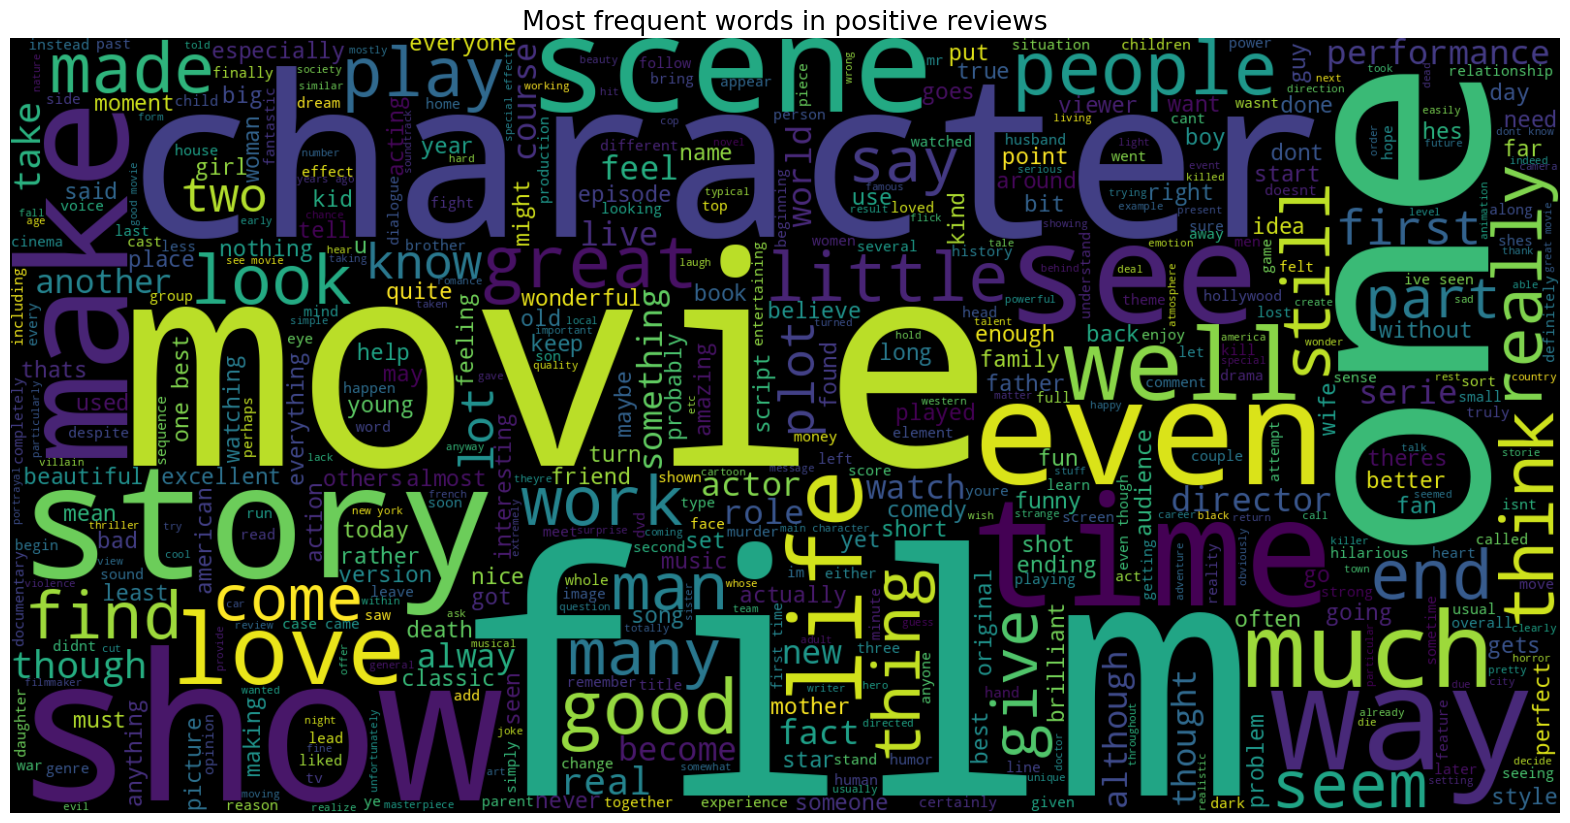

In [ ]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
  for word in text.split():
    count[word] += 1
count.most_common(20)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971),
 ('first', 8818),
 ('films', 8433),
 ('love', 8363),
 ('people', 8333),
 ('best', 8268)]

In [ ]:
pos_words = pd.DataFrame(count.most_common(20))
pos_words.columns = ['word','count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


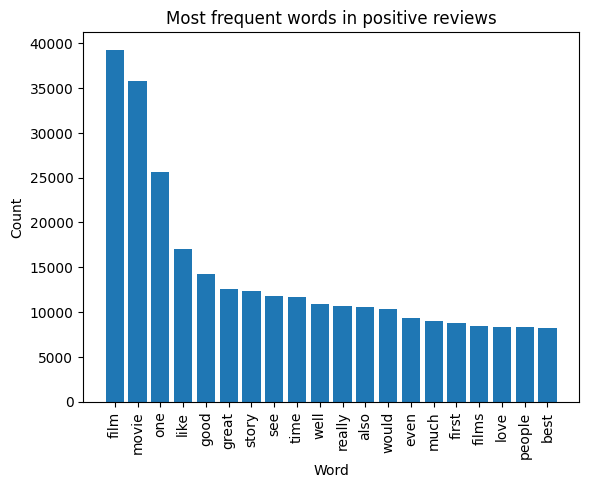

In [ ]:
plt.bar(x=pos_words['word'], height=pos_words['count'])
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Most frequent words in positive reviews")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
neg_reviews= df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,0,67
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,51
11,saw movie 12 came recall scariest scene big bi...,0,84


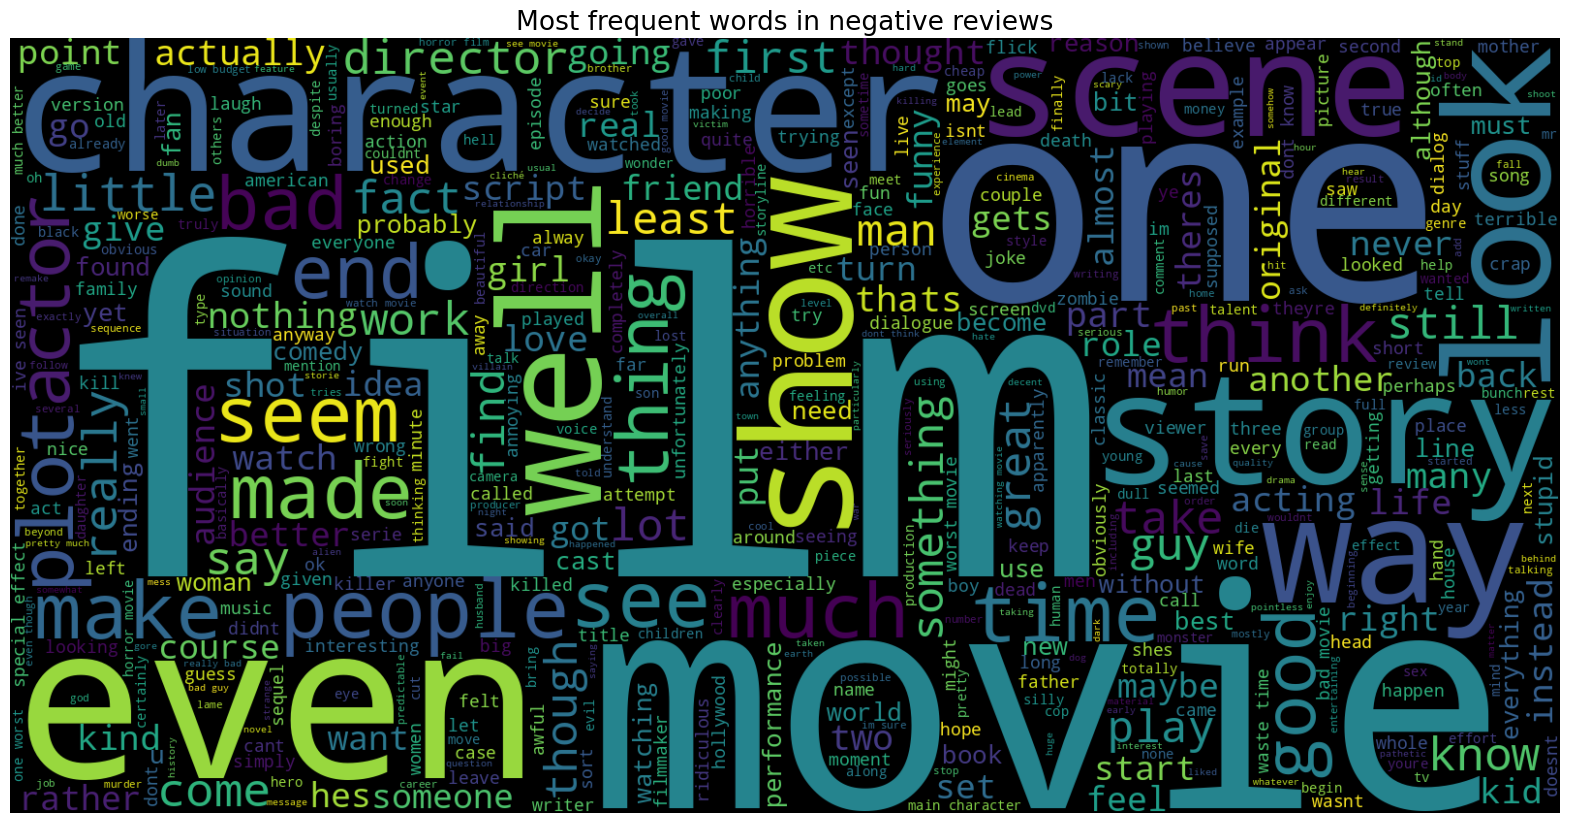

In [ ]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()

In [ ]:
count = Counter()
for text in neg_reviews['review'].values:
  for word in text.split():
    count[word] += 1
count.most_common(20)

[('movie', 47002),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14760),
 ('good', 13996),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9564),
 ('people', 8988),
 ('could', 8917),
 ('make', 8901),
 ('made', 8299),
 ('movies', 8284)]

In [ ]:
neg_words = pd.DataFrame(count.most_common(20))
neg_words.columns = ['word','count']
neg_words.head()

,word,count
0,movie,47002
1,film,34651
2,one,24361
3,like,21508
4,even,14760


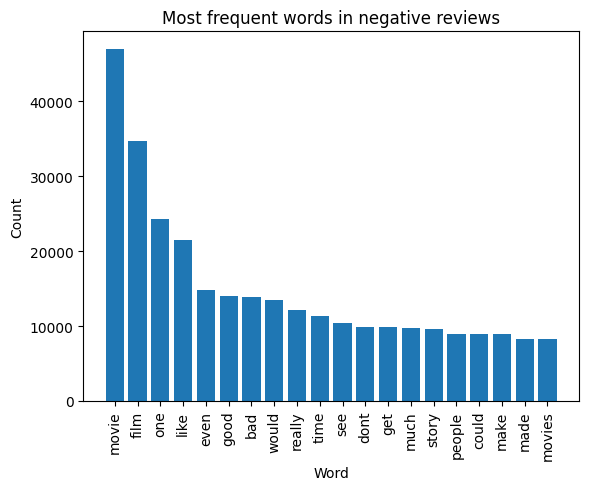

In [ ]:
plt.bar(x=neg_words['word'], height=neg_words['count'])
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Most frequent words in negative reviews")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
X = df['review']
y= df['sentiment']


In [ ]:
vect = TfidfVectorizer(max_features=5000)
X = vect.fit_transform(X)

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34705, 5000)
Size of y_train:  (34705,)
Size of x_test:  (14874, 5000)
Size of y_test:  (14874,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
pred_lr = LR.predict(x_test)
print(classification_report(y_test,pred_lr))
print("Accuracy: {:.2f}%".format(accuracy_score(pred_lr,y_test)*100))


              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7368
           1       0.88      0.89      0.89      7506

    accuracy                           0.88     14874
   macro avg       0.88      0.88      0.88     14874
weighted avg       0.88      0.88      0.88     14874

Accuracy: 88.48%


Axes(0.125,0.11;0.62x0.77)


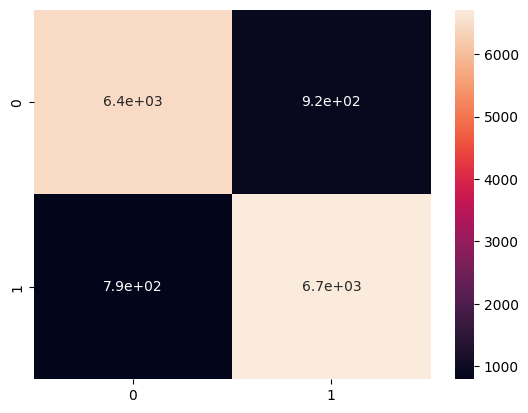

In [ ]:
print(sns.heatmap(confusion_matrix(y_test,pred_lr),annot = True))

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
pred_mnb = mnb.predict(x_test)
print(classification_report(y_test,pred_mnb))
print("Accuracy: {:.2f}%".format(accuracy_score(pred_mnb,y_test)*100))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7368
           1       0.85      0.86      0.85      7506

    accuracy                           0.85     14874
   macro avg       0.85      0.85      0.85     14874
weighted avg       0.85      0.85      0.85     14874

Accuracy: 85.12%


In [ ]:
svc = LinearSVC(C = 0.1, loss='squared_hinge')
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(classification_report(y_test,pred_svc))
print("Accuracy: {:.2f}%".format(accuracy_score(pred_svc,y_test)*100))


              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7368
           1       0.88      0.90      0.89      7506

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874

Accuracy: 88.51%


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'loss':['hinge','squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.879 total time=   0.1s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.1s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.876 total time=   0.1s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.1s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.1s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.885 total time=   0.4s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.4s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.882 total time=   0.4s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.887 total time=   0.5s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.887 total time=   0.4s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.882 total time=   0.4s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(C=0.1),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [ ]:
print("Best cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross validation score: 0.89
Best parameters:  {'C': 0.1, 'loss': 'squared_hinge'}
Best estimator:  LinearSVC(C=0.1)


In [ ]:
print(confusion_matrix(y_test,pred_svc))

[[6442  926]
 [ 783 6723]]
